In [1]:
# plotting in base env

In [2]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.wcs import WCS

In [4]:
gll_psc_v29 = fits.open('/Users/songdeheng/Workspace/FermiData/Models/gll_psc_v29.fit')

In [5]:
gll_psc_v29.info()

Filename: /Users/songdeheng/Workspace/FermiData/Models/gll_psc_v29.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   ()      
  1  LAT_Point_Source_Catalog    1 BinTableHDU    455   6659R x 79C   [18A, I, E, E, E, E, E, E, E, E, E, E, I, 18A, E, E, E, E, E, E, 17A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8E, 16E, 8E, 8E, E, E, E, E, E, E, D, E, 12E, 24E, 12E, 18A, 18A, 18A, 18A, 18A, 18A, A, 30A, 5A, 10A, 28A, 28A, E, E, D, D, E, I]   
  2  ExtendedSources    1 BinTableHDU     76   78R x 11C   [17A, E, E, E, E, 11A, E, E, E, 11A, 24A]   
  3  ROIs          1 BinTableHDU    127   1988R x 12C   [I, E, E, E, E, E, E, E, E, E, E, E]   
  4  Components    1 BinTableHDU     55   19R x 9C   [E, E, I, I, E, E, E, I, I]   
  5  EnergyBounds    1 BinTableHDU     56   20R x 10C   [E, E, E, I, I, E, E, E, I, I]   
  6  Hist_Start    1 BinTableHDU     23   13R x 1C   [D]   
  7  GTI           1 BinTableHDU 

In [10]:
gll_psc_v29[2].data['Source_Name']

chararray(['SMC-Galaxy', 'HB 3', 'W 3', 'Fornax A', 'G150.3+4.5', 'HB 9',
           'LMC-FarWest', 'LMC-Galaxy', 'LMC-30DorWest', 'LMC-North',
           'Crab IC', 'S 147', 'IC 443', 'Rosette', 'Monoceros',
           'Puppis A', 'Vela X', 'Vela Junior', 'G279.0+1.1',
           'Westerlund 2', 'FGES J1036.3-5833', 'FGES J1109.4-6115',
           'G296.5+10.0', 'FGES J1213.3-6240', 'HESS J1303-631',
           'CenA Lobes', 'HESS J1356-645', 'FGES J1409.1-6121',
           'HESS J1420-607', 'RCW 86', 'FHES J1501.0-6310',
           'HESS J1507-622', 'MSH 15-52', 'HESS J1534-571',
           'MSH 15-56 PWN', 'MSH 15-56 SNR', 'FGES J1553.8-5325',
           'HESS J1614-518', 'HESS J1616-508', 'FHES J1626.9-2431',
           'FGES J1631.6-4756', 'FGES J1633.0-4746', 'G337.0-0.1',
           'HESS J1640-465', 'FHES J1642.1-5428', 'FGES J1652.2-4633',
           'FGES J1655.5-4737', 'RX J1713.7-3946', 'FHES J1723.5-0501',
           'FHES J1741.6-3917', 'FGES J1745.8-3028', 'W 28',
      

In [64]:
temp = fits.open('/Users/songdeheng/Workspace/FermiData/Models/LAT_extended_sources_8years/Templates/FornaxA.fits')

In [65]:
temp.info()

Filename: /Users/songdeheng/Workspace/FermiData/Models/LAT_extended_sources_8years/Templates/FornaxA.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     112   (128, 128)   float64   


In [66]:
temp[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  128 / length of data axis 1                          
NAXIS2  =                  128 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2010-02-26T18:39:06' / Date FITS file was generated                  
IRAF-TLM= '2010-02-26T18:39:06' / Time of last modification                     
OBJECT  = 'F1      '                                                            
TELESCOP= '        '        

In [67]:
temp[0].data.sum()

54266796.19271131

Changed DATE-OBS from '07/10/86' to '1986-10-07''. [astropy.wcs.wcs]


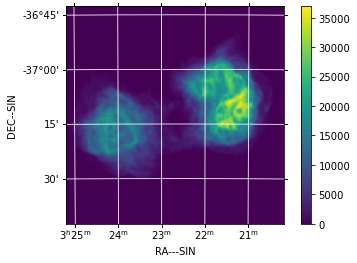

In [68]:
wcs = WCS(temp[0].header)
plt.subplot(projection=wcs)# , slices=('x', 'y', 50))
plt.imshow((temp[0].data))
plt.colorbar()
plt.grid(color='white', ls='solid')
plt.xlabel(temp[0].header['CTYPE1'])
plt.ylabel(temp[0].header['CTYPE2'])

In [69]:
# fermipy

In [12]:
import os
from fermipy.gtanalysis import GTAnalysis

http://localhost:8888/edit/Workspace/Fermi-Analysis/Fermipy/fornaxa.yaml

In [13]:
!cat ./fornaxa.yaml

data:
  evfile : /Users/songdeheng/Workspace/FermiData/weekly/photon/filelist.txt
  scfile : /Users/songdeheng/Workspace/FermiData/mission/spacecraft/lat_spacecraft_merged.fits
  
binning:
  roiwidth   : 20.0
  binsz      : 0.1 # spatial bin size in deg
  binsperdec : 10  # nb energy bins per decade
  
selection:

  emin    : 100
  emax    : 1000000
  zmax    : 90
  evclass : 1024
  evtype  : 3
  tmin    : 239557417 # beginning of the data
  tmax    : 618049985 # 12-year data
  filter : 'DATA_QUAL>0 && LAT_CONFIG==1'
  roicut : 'no'
  glon    : 240.1667
  glat    : -56.6929
  
gtlike:
  edisp : True
  irfs : 'P8R3_ULTRACLEANVETO_V3'
  edisp_disable : ['isodiff']
  
model:
  src_roiwidth : 30.0
  galdiff  : 'gll_iem_v07.fits'
  isodiff  : 'iso_P8R3_ULTRACLEANVETO_V3_v1.txt'
  catalogs : ['/Users/songdeheng/Workspace/FermiData/Models/gll_psc_v29_modified.fit']
  # catalogs : ['4FGL-DR2']

fileio:
   outdir : '/Users/songdeheng/Workspace/Fermi-Analysis/Fermipy'

In [14]:
gta = GTAnalysis('./fornaxa.yaml',logging={'verbosity' : 3})

2022-05-11 17:49:18 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8


In [15]:
gta.setup()

2022-05-11 17:49:35 INFO    GTAnalysis.setup(): Running setup.
2022-05-11 17:49:35 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2022-05-11 17:49:35 INFO    GTBinnedAnalysis.run_gtapp(): Running gtselect.
2022-05-11 17:49:35 INFO    GTBinnedAnalysis.run_gtapp(): time -p gtselect infile=/Users/songdeheng/Workspace/Fermi-Analysis/Fermipy/evfile_00.txt outfile=/Users/songdeheng/Workspace/Fermi-Analysis/Fermipy/ft1_00.fits ra=50.67000174327515 dec=-37.21002096893005 rad=14.642135623730951 tmin=239557417.0 tmax=618049985.0 emin=100.0 emax=1000000.0 zmin=0.0 zmax=90.0 evclass=1024 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=3 clobber=yes debug=no gui=no mode="ql"
2022-05-11 17:49:36 INFO    GTBinnedAnalysis.run_gtapp(): This is gtselect version HEAD
2022-05-11 17:49:54 INFO    GTBinnedAnalysis.run_gtapp(): 
2022-05-11 17:49:54 INFO    GTBinnedAnalysis.run_gtapp(): WARNING:
2022-05-11 17:49:54 INFO    GTBinnedAnalysis.run_gtapp(): Over writing ex

2022-05-12 02:27:39 INFO    GTBinnedAnalysis.run_gtapp(): This is gtsrcmaps version HEAD
2022-05-12 02:27:39 INFO    GTBinnedAnalysis.run_gtapp(): Using evtype=3 (i.e., FRONT/BACK irfs)
2022-05-12 02:27:39 INFO    GTBinnedAnalysis.run_gtapp(): ResponseFunctions::load: IRF used: P8R3_ULTRACLEANVETO_V3
2022-05-12 02:27:39 INFO    GTBinnedAnalysis.run_gtapp(): event_types:  0  1
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0322.6-3712e
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0319.9-3821
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0334.2-3725
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0336.8-3612
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0326.7-3404
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0310.9-3458
2022-05-12 02:28:06 INFO    GTBi

2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0429.3-4326
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0357.0-4955
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0231.2-4745
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0345.2-2353
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0212.4-3502
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0416.0-4743
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0238.1-2621
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0429.3-3238
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0214.6-4333
2022-05-12 02:28:06 INFO    GTBinnedAnalysis.run_gtapp(): Creating source named 4FGL J0207.4-3855
2022-05-12 02:28:06 

2022-05-12 02:29:50 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0250.3-3422 41....................!
2022-05-12 02:29:53 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0252.0-3657 41....................!
2022-05-12 02:29:56 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0252.3-2707 41....................!
2022-05-12 02:30:00 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0252.8-2219 41....................!
2022-05-12 02:30:03 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0301.4-3124 41....................!
2022-05-12 02:30:06 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0301.9-2731 41....................!
2022-05-12 02:30:09 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0303.4-2407 41....................!
2022-05-12 02:30:12 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0304.4-2833 41....................!


2022-05-12 02:36:27 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0416.2-4353 41....................!
2022-05-12 02:36:30 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0418.4-4342 41....................!
2022-05-12 02:36:34 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0420.3-3745 41....................!
2022-05-12 02:36:37 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0420.6-4802 41....................!
2022-05-12 02:36:40 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0425.1-2920 41....................!
2022-05-12 02:36:43 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0427.3-3900 41....................!
2022-05-12 02:36:46 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0428.6-3756 41....................!
2022-05-12 02:36:49 INFO    GTBinnedAnalysis.run_gtapp(): Generating SourceMap for 4FGL J0428.7-5003 41....................!


Drm_Cache::update Measured counts < 0 4FGL J0243.1-4218 39 -5.77966e-15 1.98038e-14
8.57102e-05 0.000424731 0.00178758 0.0065668 0.0213379 0.0622106 0.16088 0.368672 0.745776 1.37228 2.26896 3.29656 4.23867 4.85714 4.9597 4.54032 3.73231 2.77123 1.88114 1.15579 0.635948 0.3156 0.14204 0.0576997 0.0213188 0.00712617 0.00214208 0.000576999 0.000139617 3.04235e-05 5.97728e-06 1.05709e-06 1.68122e-07 2.41017e-08 3.10933e-09 3.5867e-10 3.69208e-11 3.39032e-12 2.77553e-13 1.98038e-14 


2022-05-12 02:45:12 INFO    GTAnalysis.setup(): Initializing source properties
2022-05-12 02:45:24 INFO    GTAnalysis.setup(): Finished setup.


In [16]:
gta.print_roi()

2022-05-12 02:45:24 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0322.6-3712e  SpatialMap     PowerLaw          0.000       nan      1128.6
4FGL J0319.9-3821   PointSource    PowerLaw          1.265       nan       591.0
4FGL J0334.2-3725   PointSource    LogParabola       2.305       nan      4472.7
4FGL J0336.8-3612   PointSource    PowerLaw          3.015       nan      1490.1
4FGL J0326.7-3404   PointSource    LogParabola       3.241       nan       232.0
4FGL J0310.9-3458   PointSource    PowerLaw          3.259       nan       222.4
4FGL J0334.2-4008   PointSource    LogParabola       3.700       nan      7316.7
4FGL J0309.4-4000   PointSource    PowerLaw          3.808       nan       162.6
4FGL J0347.7-3616   PointSource    PowerLaw          5.114       nan       808.1
4FGL J0312.4-3221   PointSource    PowerLaw          5.2

In [17]:
gta.optimize()

2022-05-12 02:45:24 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['isodiff', 'galdiff', '4FGL J0348.6-2749', '4FGL J0403.9-3605', '4FGL J0334.2-4008']


/Users/songdeheng/anaconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape 4FGL J0348.6-2749 TS:  58917.855
Fitting shape isodiff TS:  46419.930
Fitting shape 4FGL J0403.9-3605 TS:  23680.117
Fitting shape 4FGL J0334.2-4008 TS:   6601.214
Fitting shape 4FGL J0334.2-3725 TS:   5035.297
Fitting shape 4FGL J0407.0-3826 TS:   4885.354
Fitting shape galdiff TS:   3904.331
Fitting shape 4FGL J0245.9-4650 TS:   3520.233
Fitting shape 4FGL J0238.4-3116 TS:   1113.017
Fitting shape 4FGL J0338.9-2848 TS:    376.772
Fitting shape 4FGL J0335.1-4459 TS:    331.348
Fitting shape 4FGL J0322.6-3712e TS:    308.405
Fitting shape 4FGL J0414.7-4300 TS:    262.576
Fitting shape 4FGL J0238.1-3905 TS:    234.417
Fitting shape 4FGL J0226.5-4441 TS:    171.826
Fitting shape 4FGL J0402.1-3147 TS:    161.034
Fitting shape 4FGL J0347.7-3616 TS:    142.662
Fitting shape 4FGL J0359.0-3053 TS:    141.260
Fitting shape 4FGL J0336.8-3612 TS:    135.792
Fitting shape 4FGL J0428.6-3756 TS:    129.020
Fitting shape 4FGL J0237.6-3602 TS:    125.455
Fitting shape 4FGL J0416.2-4353 

2022-05-12 03:35:59 INFO    GTAnalysis.optimize(): Finished
2022-05-12 03:35:59 INFO    GTAnalysis.optimize(): LogLike: -473020.365334 Delta-LogLike: 269.902643
2022-05-12 03:35:59 INFO    GTAnalysis.optimize(): Execution time: 3035.09 s


{'loglike0': -473290.2679770726,
 'loglike1': -473020.36533367704,
 'dloglike': 269.9026433955878,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [18]:
gta.print_roi()

2022-05-12 03:35:59 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0322.6-3712e  SpatialMap     PowerLaw          0.000    314.34      1240.0
4FGL J0319.9-3821   PointSource    PowerLaw          1.265     55.66       631.9
4FGL J0334.2-3725   PointSource    LogParabola       2.305   5059.75      4695.9
4FGL J0336.8-3612   PointSource    PowerLaw          3.015    131.16      1503.0
4FGL J0326.7-3404   PointSource    LogParabola       3.241     61.33       115.3
4FGL J0310.9-3458   PointSource    PowerLaw          3.259     38.28       162.3
4FGL J0334.2-4008   PointSource    LogParabola       3.700   6763.55      7155.1
4FGL J0309.4-4000   PointSource    PowerLaw          3.808     43.62       177.4
4FGL J0347.7-3616   PointSource    PowerLaw          5.114    147.25       759.7
4FGL J0312.4-3221   PointSource    PowerLaw          5.2

In [19]:
sed = gta.sed('4FGL J0322.6-3712e')

2022-05-12 11:21:19 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0322.6-3712e
2022-05-12 11:21:27 INFO    GTAnalysis._make_sed(): Fitting SED
2022-05-12 11:21:29 INFO    GTAnalysis.free_source(): Freeing parameters for 4FGL J0322.6-3712e    : ['Prefactor']
2022-05-12 11:29:50 INFO    GTAnalysis.sed(): Finished SED
2022-05-12 11:30:01 INFO    GTAnalysis.sed(): Execution time: 522.44 s


In [20]:
sed

{'name': '4FGL J0322.6-3712e',
 'loge_min': array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
        3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
        4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
        5.9]),
 'loge_max': array([2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3,
        3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6,
        4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9,
        6. ]),
 'loge_ctr': array([2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05,
        3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15,
        4.25, 4.35, 4.45, 4.55, 4.65, 4.75, 4.85, 4.95, 5.05, 5.15, 5.25,
        5.35, 5.45, 5.55, 5.65, 5.75, 5.85, 5.95]),
 'loge_ref': array([2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05,
        3.15, 3.25, 3.35, 3.45, 3.55, 3.65, 3.75, 3.85, 3.95, 4.05, 4.15,
        4.25, 4.35, 4.45, 4.55,

In [ ]:
# todo: compare with pyLike results